In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[1]])

## OR 게이트 학습 및 시각화 (ANN)
-> OR 게이트를 은닉층 1개 이용해 분리하세요.
-> 코드 분석과 함께 시각화를 해주세요.

In [37]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))   # 은닉층
model.add(Dense(1, activation='sigmoid'))             # 출력층 (이진 분류)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=1000, verbose=0)


In [38]:
def plot_linear_boundary(model, X, y):
    # 예측 클래스별 마커 모양
    markers = ['o', 's']
    
    # 각 클래스 점 그리기
    for i in range(2):
        plt.scatter(X[y.ravel()==i][:, 0], X[y.ravel()==i][:, 1],
                    marker=markers[i], label=f"Class {i}", edgecolors='k', s=80, color='skyblue')
    
    # 결정경계 선 그리기
    x1 = np.linspace(-0.1, 1.1, 100)
    x2 = np.linspace(-0.1, 1.1, 100)
    xx, yy = np.meshgrid(x1, x2)
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid, verbose=0).reshape(xx.shape)
    plt.contour(xx, yy, preds, levels=[0.5], colors='deepskyblue', linewidths=2)

    # 축 설정
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.title("Linear Case")
    plt.show()


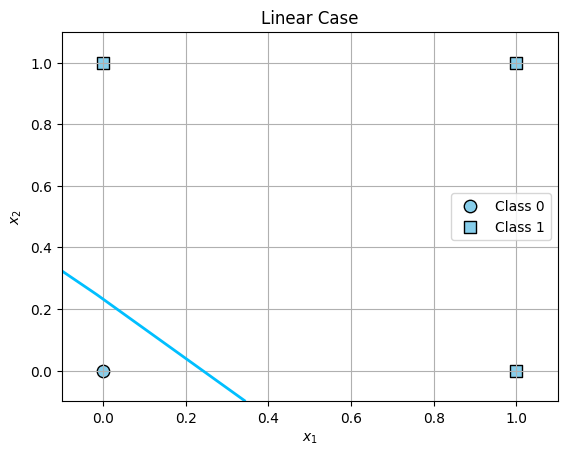

In [39]:
plot_linear_boundary(model, X, y)

## XOR 게이트 학습 및 시각화 (ANN)
-> XOR 게이트를 은닉층 1개 이용해 분리하세요.
-> 분리가 되지 않는 이유를 적어주세요.

In [40]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])


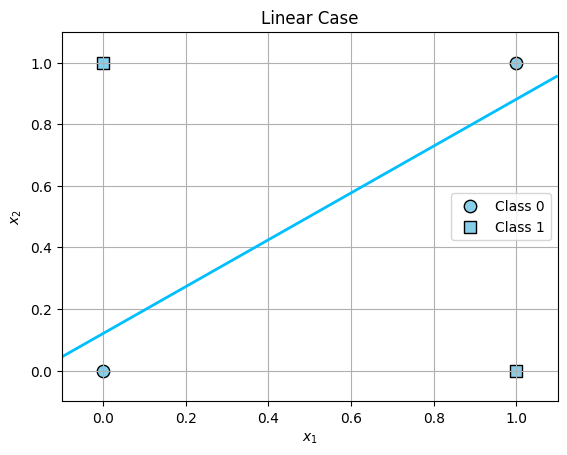

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_fail = Sequential()
model_fail.add(Dense(1, input_dim=2, activation='sigmoid'))  
model_fail.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_fail.fit(X, y, epochs=500, verbose=0)

plot_linear_boundary(model_fail, X, y)


Class 0 (y=0): (0,0), (1,1)
Class 1 (y=1): (0,1), (1,0)
네 개의 점은 대각선으로 엇갈린 형태를 이룸
이걸 분리하려면 최소한 두 개의 선이 필요함.
하지만 선형 분리는 직선 하나로 두 클래스를 나눠야 하기 때문에 직선 하나로 저 네 점을 두 클래스(0과 1)로 나눌 수 있는 방법이 없음 ->단순 선형 조합으로 표현할 수 없는 비선형 관계

## XOR 게이트 학습 및 시각화 (DNN)
-> XOR 게이트를 DNN으로 분리
-> 분리가 되는 이유를 적어주세요.
-> 코드 분석과 시각화를 해주세요.

In [42]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # 은닉층 1개, 노드 4개
model.add(Dense(1, activation='sigmoid'))            # 출력층

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=1000, verbose=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step


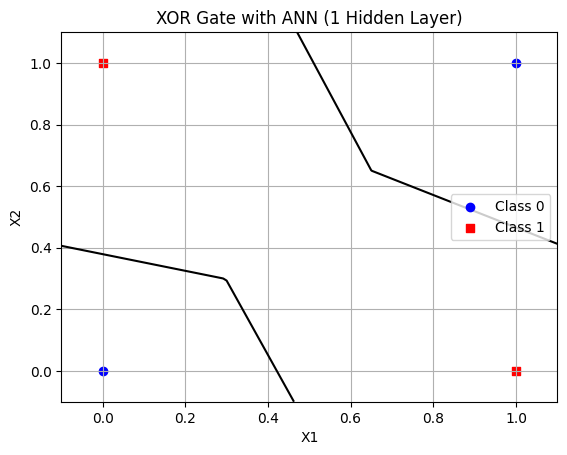

In [43]:
# 예측된 클래스
y_pred = (model.predict(X) > 0.5).astype(int)

# 시각화
for i in range(len(X)):
    if y[i][0] == 0:
        plt.scatter(X[i][0], X[i][1], c='blue', marker='o', label='Class 0' if i==0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], c='red', marker='s', label='Class 1' if i==1 else "")

# 결정 경계 그리기
x1s = np.linspace(-0.1, 1.1, 100)
x2s = np.linspace(-0.1, 1.1, 100)
xx, yy = np.meshgrid(x1s, x2s)
grid = np.c_[xx.ravel(), yy.ravel()]
zz = model.predict(grid).reshape(xx.shape)
plt.contour(xx, yy, zz, levels=[0.5], colors='black')

plt.legend()
plt.title("XOR Gate with ANN (1 Hidden Layer)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

은닉층을 1개 추가하면, 모델은 입력 공간을 비선형적으로 변형할 수 있게 된다.
은닉층의 뉴런과 활성화 함수(ReLU 등)는 데이터를 고차원 공간으로 매핑하며, 이 과정을 통해 서로 엇갈린 점들을 같은 쪽으로 몰아주는 효과를 낸다.
그 결과 출력층에서는 선형 분리(즉, 직선)를 이용해 두 클래스를 구분할 수 있게 된다.

따라서 은닉층이 없는 단층 모델은 XOR 게이트를 분리할 수 없지만, 은닉층이 포함된 다층 퍼셉트론(Multilayer Perceptron)은 XOR과 같은 비선형 문제도 해결할 수 있다.